In [1]:
#############HERE#############

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import operator

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the adjusted data frame

In [16]:
#############HERE#############

tracer91_data = r'/content/drive/MyDrive/MM Project/Data/tracer_91.pickle'

tracer91_df = pickle.load(open(tracer91_data, "rb" ) )
print(tracer91_df)

Flow            0                                 1  ...   8                        
Beacon        201   202   203   258   259   260 253  ... 246 247 248 249 250 251 272
timeline[s]                                          ...                            
0.1         -74.0   NaN -50.0 -57.0 -71.0 -73.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
0.2         -74.0 -47.0 -50.0 -57.0 -71.0 -73.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
0.3         -74.0 -47.0 -50.0 -57.0 -71.0 -73.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
0.4         -74.0 -47.0 -50.0 -57.0 -71.0 -73.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
0.5         -48.0 -47.0 -50.0 -57.0 -57.0 -73.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
...           ...   ...   ...   ...   ...   ...  ..  ...  ..  ..  ..  ..  ..  ..  ..
42119.2     -61.0 -67.0 -64.0 -62.0 -59.0 -50.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
42119.3     -62.0 -64.0 -62.0 -65.0 -58.0 -53.0 NaN  ... NaN NaN NaN NaN NaN NaN NaN
42119.4     -62.0 -64.0 -62.0 -65.0 -58.0 -53.0 NaN  ... NaN NaN 

# Checking

In [ ]:
print(tracer91_df.iloc[1,:].idxmax(axis=1))
print(tracer91_df.idxmax(axis=1))

print(tracer91_df.iloc[1,:].idxmax(axis=1))
print(tracer91_df.idxmax(axis=1))

(1, 202)
timeline[s]
0.1        (1, 203)
0.2        (1, 202)
0.3        (1, 202)
0.4        (1, 202)
0.5        (1, 202)
             ...   
42119.2    (8, 250)
42119.3    (8, 250)
42119.4    (8, 250)
42119.5    (8, 250)
42119.6    (8, 249)
Length: 421196, dtype: object


In [ ]:
print(tracer91_df.iloc[0,:].max())

-50.0


# TO DO


* create a special region (*region 0?*) for the beacons in "Pause/Not in Use" DONE
* adjust the previous df DONE
* rename "location_of_person" to "location_of_tracer" DONE
* implement the previous steps in a function DONE

Template ausfüllen
für den Pitch: mit den Daten Geschichten erzählen

## Further questions/tasks

* integrate waiting rooms (regions with no beacons)



# Function to detect the location of the tracer

In [3]:
#############HERE#############

def get_max_values(tracer_dataframe):
  max_df = pd.DataFrame(data=list(tracer_dataframe.max(axis=1)), index = range(len(tracer_dataframe)), columns = ["max_distance"]) #max values of each row in the original df
  max_df['time'] = tracer_dataframe.index
  max_df['region_beacon'] = list(tracer_dataframe.idxmax(axis=1)) #corresponding beacon id and region number of the max value
  #max_df['location_of_tracer'] = 0 #zero as default
  #max_df['region'] = max_df['region_beacon'][0]

  location = []
  for row in max_df.itertuples():
    if row[1] >= -65: #if the maximum value is over -65 (adjust the value?) then the tracer is located in the responding region 
      location.append(row[3][0])
    else: #otherwise the tracer can be still allocated to the previous region (the region where it has been located before)
      location.append(location[-1]) 

  max_df['location_of_tracer'] = location

  max_df = max_df[['time', 'max_distance', 'region_beacon', 'location_of_tracer']]

  return max_df

In [4]:
new_df = get_max_values(tracer91_df)

In [5]:
print(new_df)

           time  max_distance region_beacon  location_of_tracer
0           0.1         -50.0      (0, 203)                   0
1           0.2         -47.0      (0, 202)                   0
2           0.3         -47.0      (0, 202)                   0
3           0.4         -47.0      (0, 202)                   0
4           0.5         -47.0      (0, 202)                   0
...         ...           ...           ...                 ...
421191  42119.2         -50.0      (0, 260)                   0
421192  42119.3         -53.0      (0, 260)                   0
421193  42119.4         -53.0      (0, 260)                   0
421194  42119.5         -53.0      (0, 260)                   0
421195  42119.6         -54.0      (0, 259)                   0

[421196 rows x 4 columns]


In [ ]:
print(new_df.max_distance.max())
print(new_df.max_distance.min())
print(new_df.max_distance.idxmin())
print(new_df.iloc[44543,:])
print(new_df.iloc[44544,:])
print(new_df.iloc[44545,:])


-16.0
-91.0
44543
time                    4454.4
max_distance               -91
region_beacon         (3, 209)
location_of_tracer           3
Name: 44543, dtype: object
time                    4454.5
max_distance               -91
region_beacon         (3, 209)
location_of_tracer           3
Name: 44544, dtype: object
time                    4454.6
max_distance               -91
region_beacon         (5, 211)
location_of_tracer           3
Name: 44545, dtype: object


In [6]:
#############HERE#############

# order of location of tracer

order_reg = []
order_time = []

for index, value in new_df.location_of_tracer.iteritems():
  if index == 0:
    order_reg.append([value, index])    
  elif value != order_reg[-1][0]:
    order_reg.append([value, index])
    #order_time.append(index)
  if index == 100000:
    break


In [7]:
print(order_reg)

[[0, 0], [5, 17552], [8, 22545], [0, 26953], [1, 33782], [3, 35613], [5, 38279], [3, 41871], [5, 43196], [6, 46755], [8, 47281], [6, 47284], [8, 47347], [6, 47386], [8, 48077], [0, 51567], [5, 69972], [6, 71540], [8, 73301], [0, 79032], [6, 95175], [3, 95619], [1, 95958], [0, 96113]]


In [ ]:
print(new_df.max_distance.describe())

count    337119.000000
mean        -59.416512
std          19.245003
min         -91.000000
25%         -77.000000
50%         -64.000000
75%         -41.000000
max         -16.000000
Name: max_distance, dtype: float64


In [ ]:
#for index, value in tracer91_df.iloc[0,:].iteritems():
#  print(value)
# print(tracer91_df.iloc[0,:])

#(Drop Columns (0s and most of 8s) or) Make lists

In [8]:
#############HERE#############

# order of location of tracer
def order_list(df_location):
  order_reg = []
  order_reg_index = []

  for index, value in df_location.iteritems():
    if index == 0:
      order_reg.append(value)
      order_reg_index.append([value, index])    
    elif value != order_reg_index[-1][0]:
      order_reg.append(value)
      order_reg_index.append([value, index])
  return order_reg, order_reg_index

In [9]:
#############HERE#############

orderlist, orderlist_plus_index = order_list(new_df.location_of_tracer)
print(orderlist)
print(orderlist_plus_index)

[0, 5, 8, 0, 1, 3, 5, 3, 5, 6, 8, 6, 8, 6, 8, 0, 5, 6, 8, 0, 6, 3, 1, 0, 1, 3, 5, 6, 5, 6, 5, 6, 5, 6, 8, 0, 1, 0, 1, 3, 5, 6, 8, 0, 1, 0, 1, 3, 5, 6, 5, 6, 8, 6, 0, 1, 0, 1, 3, 5, 6, 8, 6, 8, 6, 8, 6, 8, 0, 1, 0, 1, 3, 5, 6, 8, 0, 1, 0, 5, 8, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 5, 6, 8, 0, 1, 0, 1, 0, 1, 3, 5, 6, 8, 6, 8, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 5, 6, 8, 0, 1, 0, 1, 3, 5, 6, 8, 0]
[[0, 0], [5, 17552], [8, 22545], [0, 26953], [1, 33782], [3, 35613], [5, 38279], [3, 41871], [5, 43196], [6, 46755], [8, 47281], [6, 47284], [8, 47347], [6, 47386], [8, 48077], [0, 51567], [5, 69972], [6, 71540], [8, 73301], [0, 79032], [6, 95175], [3, 95619], [1, 95958], [0, 96113], [1, 100147], [3, 103252], [5, 106193], [6, 108482], [5, 108490], [6, 109196], [5, 109202], [6, 109212], [5, 109218], [6, 109220], [8, 113896], [0, 119828], [1, 123829], [0, 124071], [1, 130134], [3, 132960], [5, 141864], [6, 141898], [8, 14

In [ ]:
# n = 30
# lists = [[] for _ in range(n)]
# lists
# print(lists)

In [10]:
#############HERE#############

def make_person_list(order_of_df, o_plus_index):
  newlist = []
  innerlist = []

  for index, value in enumerate(order_of_df):
    if index == 0 and value == 0:
      next
    elif value != 0:
      innerlist.append(value)
    else:
      newlist.append(value)
      newlist.append(innerlist)
      innerlist = []

  newlist_tup = []
  innerlist_tup = []
  
  for index, values in enumerate(o_plus_index):
    if index == 0 and values[0] == 0:
      next
    elif values[0] != 0:
      innerlist_tup.append((values[0], values[1]))
    else:
      newlist_tup.append((values[0], values[1]))
      newlist_tup.append(innerlist)
      innerlist_tup = []    

  return newlist, newlist_tup


In [11]:
#############HERE#############

listchen, list2 = make_person_list(orderlist, orderlist_plus_index)
print(listchen)
print(list2)

[0, [5, 8], 0, [1, 3, 5, 3, 5, 6, 8, 6, 8, 6, 8], 0, [5, 6, 8], 0, [6, 3, 1], 0, [1, 3, 5, 6, 5, 6, 5, 6, 5, 6, 8], 0, [1], 0, [1, 3, 5, 6, 8], 0, [1], 0, [1, 3, 5, 6, 5, 6, 8, 6], 0, [1], 0, [1, 3, 5, 6, 8, 6, 8, 6, 8, 6, 8], 0, [1], 0, [1, 3, 5, 6, 8], 0, [1], 0, [5, 8], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1, 3, 5, 6, 8], 0, [1], 0, [1], 0, [1, 3, 5, 6, 8, 6, 8], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1], 0, [1, 3, 5, 6, 8], 0, [1], 0, [1, 3, 5, 6, 8]]
[(0, 26953), [], (0, 51567), [], (0, 79032), [], (0, 96113), [], (0, 119828), [], (0, 124071), [], (0, 152832), [], (0, 175336), [], (0, 200335), [], (0, 207323), [], (0, 233607), [], (0, 245650), [], (0, 274104), [], (0, 280456), [], (0, 298229), [], (0, 313682), [], (0, 313697), [], (0, 313709), [], (0, 313729), [], (0, 313906), [], (0, 314008), [], (0, 314015), [], (0, 314073), [], (0, 314077), [], (0, 314095), [], (0, 314107), [], (

### Not working yet and not important

In [ ]:
def cut_off2(list_noindex):
  nozeros = []
  for index, value in enumerate(list_noindex):
    if value != 0 or value != 8:
      nozeros.append(value)
    elif value == 8 and list_noindex[index-1] != 0:
      nozeros.append(value)

    return nozeros

In [ ]:
showme = cut_off2(orderlist)
print(showme)

[0]


In [ ]:
for i, val in enumerate(orderlist):
  if i < 10 and val != 1:
    print(val)

0
8
0
8
0
8
0
8
0
8


# Graph



* get a first glimpse of the path the tracer did take
* spot unexpected paths (wrong order)



# Add second and third maximum value to max_df

In [ ]:
def second_max(tracer_df, max_df):
  copy_tracer = tracer_df.copy()
   #delete max value and then get new max
   # or order each row and get value in seocnd row (pandas.DataFrame.sort_values)
  for row in max_df.itertuples:
    max = row[2]
    if 


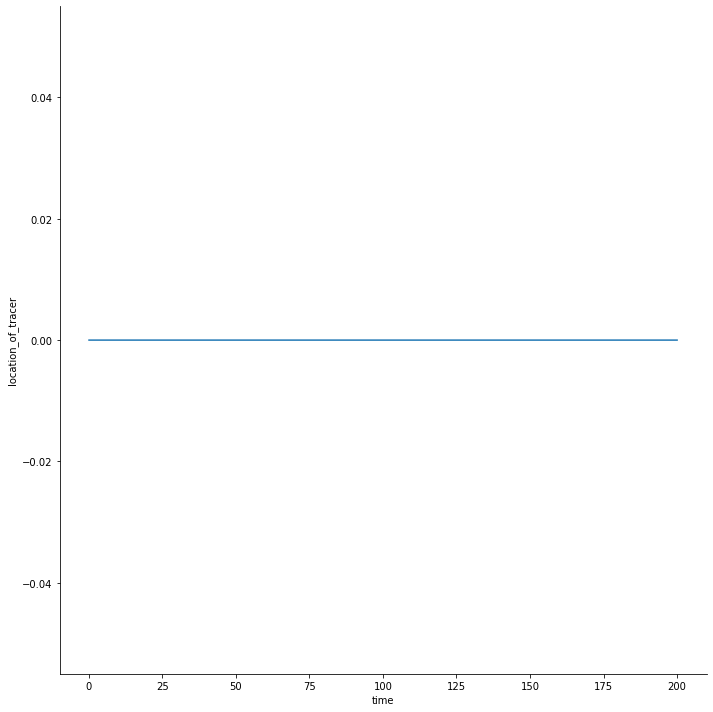

In [ ]:
sns.relplot(data=new_df.iloc[0:2000,:], x="time", y="location_of_tracer", kind="line", height=10)
plt.show()

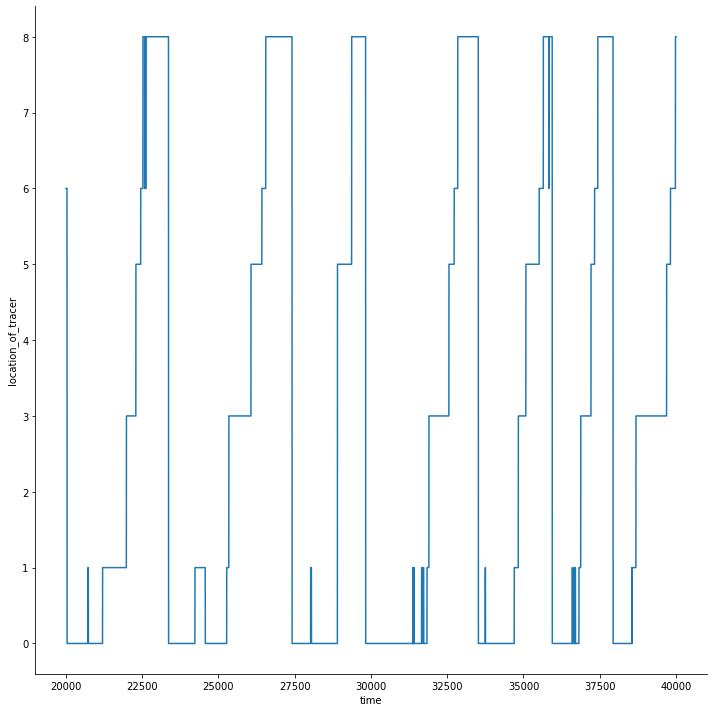

In [15]:
#############HERE#############

sns.relplot(data=new_df.iloc[200000:400000,:], x="time", y="location_of_tracer", kind="line", height=10)
plt.show()

In [ ]:
first_data = map(operator.itemgetter(0), new_df.region_beacon)

sns.relplot(data=new_df, x="time", y=first_data, kind="scatter", height=10)
plt.show()

TypeError: ignored

In [ ]:
print(type(new_df.region_beacon))
print(new_df.region_beacon = a)

<class 'pandas.core.series.Series'>
0         (0, 203)
1         (0, 202)
2         (0, 202)
3         (0, 202)
4         (0, 202)
            ...   
421191    (8, 250)
421192    (8, 250)
421193    (8, 250)
421194    (8, 250)
421195    (8, 249)
Name: region_beacon, Length: 421196, dtype: object


In [ ]:
first_data = map(lambda x: x[0], new_df.region_beacon)
print(first_data)

# display data
for i in first_data:
    print(i)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

TypeError: ignored

ValueError: ignored

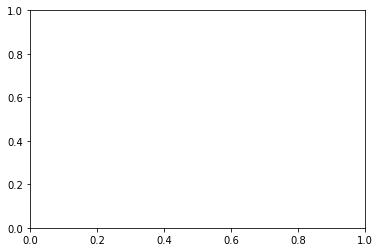

In [ ]:
plt.scatter(new_df.time, new_df.region_beacon[0])
plt.show()

In [ ]:
print(new_df.time.shape)
#print(new_df.region_beacon[0].shape)
print(new_df.region_beacon[0].describe)


(421196,)


AttributeError: ignored

# First attemps

In [ ]:
# create df for the max values of each row (plus time and beacon id)

#columnnames = ['time', 'max_distance', 'beacon_id'] 
#max_beacons_df = pd.DataFrame(columns = columnnames)

#print(max_beacons_df)

Empty DataFrame
Columns: [time, max_distance, beacon_id]
Index: []


In [ ]:
max_value = tracer91_df.max(axis=1)
print(max_value)

timeline[s]
0.1       -50.0
0.2       -47.0
0.3       -47.0
0.4       -47.0
0.5       -47.0
           ... 
42119.2   -50.0
42119.3   -53.0
42119.4   -53.0
42119.5   -53.0
42119.6   -54.0
Length: 421196, dtype: float64


In [ ]:
print(tracer91_df.max().max()) #closest dictance to a beacon

-16.0


In [ ]:
max_beacons_df = pd.DataFrame(data=list(tracer91_df.max(axis=1)), index = range(len(max_value)), columns = ["max_distance"])
max_beacons_df['time'] = tracer91_df.index
max_beacons_df['region_beacon'] = list(tracer91_df.idxmax(axis=1))
max_beacons_df['location_of_person'] = 0
print(max_beacons_df)

        max_distance     time region_beacon  location_of_person
0              -50.0      0.1      (1, 203)                   0
1              -47.0      0.2      (1, 202)                   0
2              -47.0      0.3      (1, 202)                   0
3              -47.0      0.4      (1, 202)                   0
4              -47.0      0.5      (1, 202)                   0
...              ...      ...           ...                 ...
421191         -50.0  42119.2      (8, 250)                   0
421192         -53.0  42119.3      (8, 250)                   0
421193         -53.0  42119.4      (8, 250)                   0
421194         -53.0  42119.5      (8, 250)                   0
421195         -54.0  42119.6      (8, 249)                   0

[421196 rows x 4 columns]


In [ ]:
#max_beacons_df["location_of_person"][1] = 1
print(max_beacons_df["location_of_person"][1])
print(max_beacons_df["region_beacon"][1][1])

0
202


In [ ]:
##takes too long

#for index, (m, t, r, l) in max_beacons_df.iterrows():
 # if max_beacons_df['max_distance'][index] < -65:
  #  max_beacons_df.loc[index, 'location_of_person'] = max_beacons_df['region_beacon'][index][0]


KeyboardInterrupt: ignored

# Analysis of the location of the tracer

In [ ]:
max_beacons_df_copy = max_beacons_df.copy()
print(max_beacons_df_copy)

NameError: ignored

In [ ]:
location = []
for row in max_beacons_df_copy.itertuples():
  if row[1] > -65:
    location.append(row[3][0])
  else:
    location.append(location[-1])


In [ ]:
max_beacons_df_copy['location_of_person'] = location
print(max_beacons_df_copy.location_of_person.shape)
print(location)

(421196,)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
max_beacons_df_copy = max_beacons_df_copy[['time', 'max_distance', 'region_beacon', 'location_of_person']]
print(max_beacons_df_copy)

           time  max_distance region_beacon  location_of_person
0           0.1         -50.0      (1, 203)                   1
1           0.2         -47.0      (1, 202)                   1
2           0.3         -47.0      (1, 202)                   1
3           0.4         -47.0      (1, 202)                   1
4           0.5         -47.0      (1, 202)                   1
...         ...           ...           ...                 ...
421191  42119.2         -50.0      (8, 250)                   8
421192  42119.3         -53.0      (8, 250)                   8
421193  42119.4         -53.0      (8, 250)                   8
421194  42119.5         -53.0      (8, 250)                   8
421195  42119.6         -54.0      (8, 249)                   8

[421196 rows x 4 columns]


# Not important

In [ ]:
under_m65 = max_beacons_df_copy.max_distance > -65
print(max_beacons_df_copy.memory_usage(deep=True))

Index                      128
max_distance           3369568
time                   3369568
region_beacon         18872176
location_of_person     3369568
dtype: int64


In [ ]:
print(max_beacons_df)

        max_distance     time region_beacon  location_of_person
0              -50.0      0.1      (1, 203)                   0
1              -47.0      0.2      (1, 202)                   0
2              -47.0      0.3      (1, 202)                   0
3              -47.0      0.4      (1, 202)                   0
4              -47.0      0.5      (1, 202)                   0
...              ...      ...           ...                 ...
421191         -50.0  42119.2      (8, 250)                   0
421192         -53.0  42119.3      (8, 250)                   0
421193         -53.0  42119.4      (8, 250)                   0
421194         -53.0  42119.5      (8, 250)                   0
421195         -54.0  42119.6      (8, 249)                   0

[421196 rows x 4 columns]
